<center><font size=8>Hands-on - Multiple Linear Regression</font></center>

## **Problem Statement**

### Objective



As a data scientist, you are provided with multiple expenses data of families  from the recent past. You are required to analyze the data, identify patterns, build a linear regression model to forecast monthly expenses, and identify factors contributing to changes in family expenses.

### Data Dictionary

**family_size:** Number of family members

**monthly_income:** Monthly income of the family

**num_children:** Number of children in the family

**location_type:** Type of location (e.g., urban, suburban, rural)

**has_car:** Binary variable indicating whether the family owns a car (0: No, 1: Yes)

**education_level_max:** Maximum education level among family members

**dining_out:** Number of times family dines out or goes for party

**monthly_expenses:**Total monthly expenses of the family

## **Importing libraries and data**

In [1]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets (70% and 30% --80% and 20%)
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading data into a pandas dataframe
monthly_expenses = pd.read_csv("Monthly_Expenses_Dataset.csv")

In [4]:
# creating a copy of the data
data = monthly_expenses.copy()

## **Data Overview**

In [6]:
data.head(5)

,family_size,monthly_income,num_children,location_type,has_car,education_level_max,dining_out,monthly_expenses
0,5,8205,3,2,0,3,4,5827.19
1,6,2595,1,1,0,5,0,3255.99
2,4,7999,3,2,1,3,7,6165.80
3,6,2728,1,1,1,1,2,3282.03
4,6,3365,2,2,1,1,5,4691.22


In [7]:
data.shape

(500, 8)

The dataset has 8 columns and 500 records.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   family_size          500 non-null    int64  
 1   monthly_income       500 non-null    int64  
 2   num_children         500 non-null    int64  
 3   location_type        500 non-null    int64  
 4   has_car              500 non-null    int64  
 5   education_level_max  500 non-null    int64  
 6   dining_out           500 non-null    int64  
 7   monthly_expenses     500 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 31.4 KB


In [9]:
data.describe()

,family_size,monthly_income,num_children,location_type,has_car,education_level_max,dining_out,monthly_expenses
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.982000,6184.302000,1.490000,0.976000,0.528000,3.094000,5.072000,4637.421680
std,1.467646,2411.427361,1.102875,0.820225,0.499715,1.459254,3.181046,1080.456739
min,2.000000,2009.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1981.210000
25%,3.000000,4144.500000,1.000000,0.000000,0.000000,2.000000,2.750000,3864.755000
50%,4.000000,6291.500000,2.000000,1.000000,1.000000,3.000000,5.000000,4620.945000
75%,5.000000,8173.250000,2.000000,2.000000,1.000000,4.000000,8.000000,5456.935000
max,12.000000,25000.000000,3.000000,2.000000,1.000000,10.000000,25.000000,10405.920000


In [10]:
data.isnull().sum()

,0
family_size,0
monthly_income,0
num_children,0
location_type,0
has_car,0
education_level_max,0
dining_out,0
monthly_expenses,0


In [11]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

##  **Exploratory Data Analysis**

#### Utility Functions

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### **Univariate Analysis**

**Family Monthly Income**

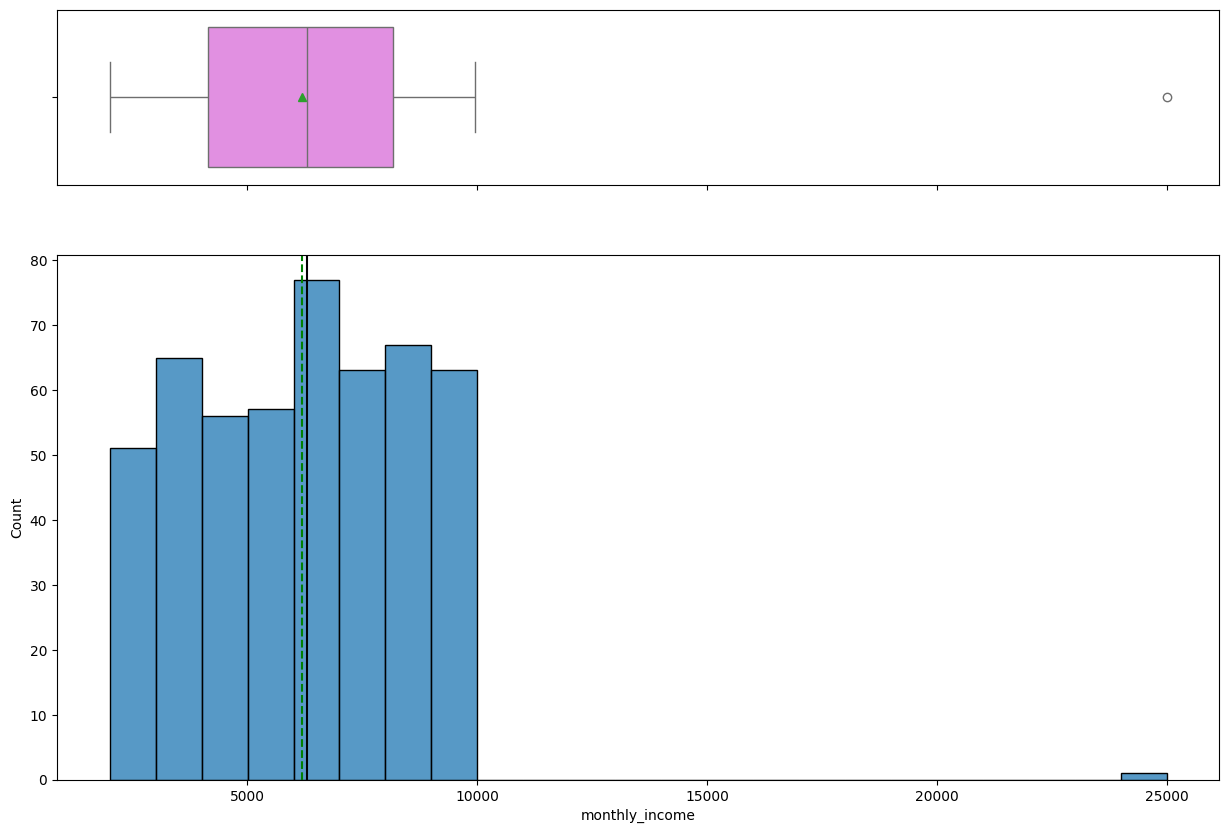

In [16]:
histogram_boxplot(data, "monthly_income")

**Observations:**

Appears right-skewed — a few families earn significantly more. There are a few outliers.

**Family Size**

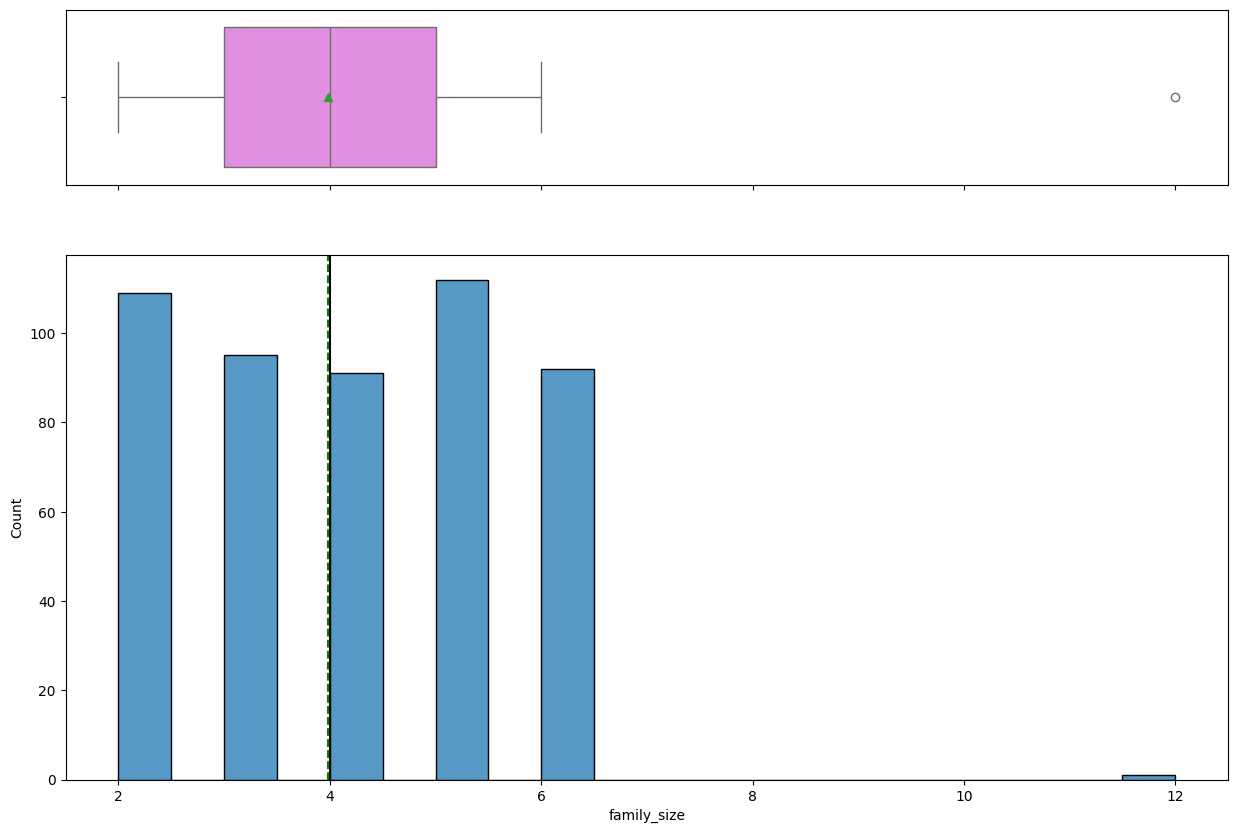

In [17]:
histogram_boxplot(data, "family_size")

**Observations:**

Mostly between 3 and 6, with a smooth distribution.

**Monthly Income**

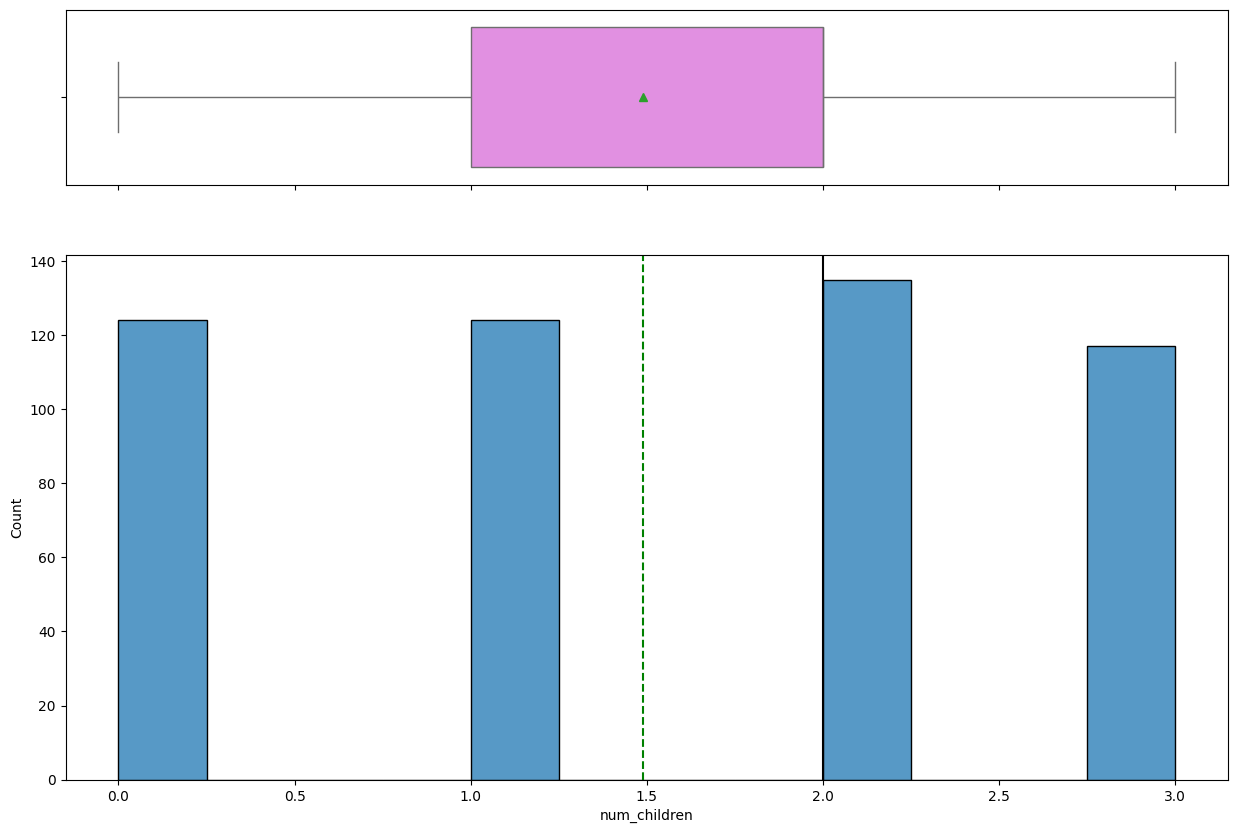

In [18]:
histogram_boxplot(data, "num_children")

**Observations:**

Mostly 0-2 - which is a trend in modern families

**Dining Out**

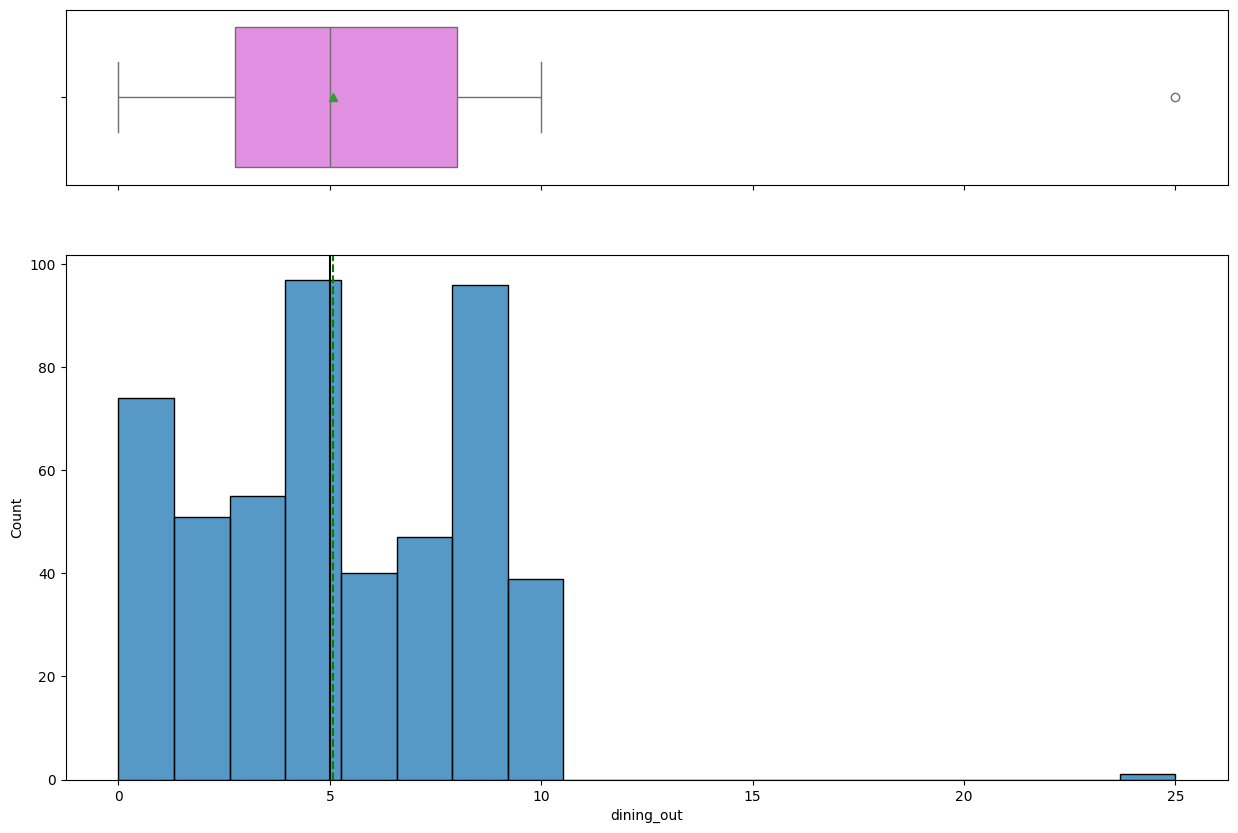

In [19]:
histogram_boxplot(data, "dining_out")

**Observations:**

Skewed right — most families dine out 0-5 times, but a few are clearly living that foodie life

**Location Type**

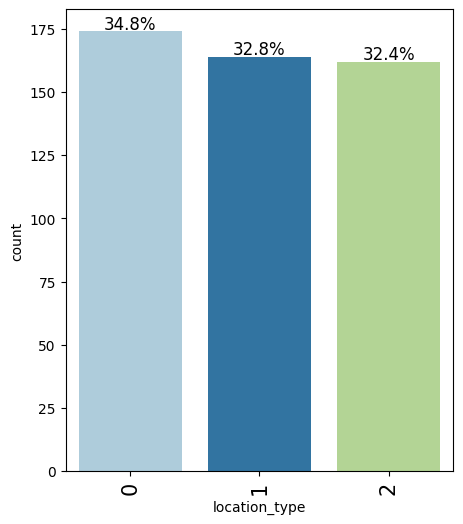

In [20]:
labeled_barplot(data, "location_type", perc=True)

Observations:

The dataset includes all three location types — rural (0), suburban (1), and urban (2) — with a slightly higher representation of rural families (174 out of 500).

**Car Ownership**

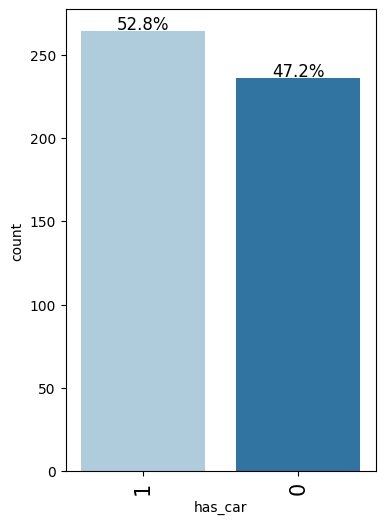

In [21]:
labeled_barplot(data, "has_car", perc=True)

**Observations:**

Fairly balanced car ownership.

**Education level**

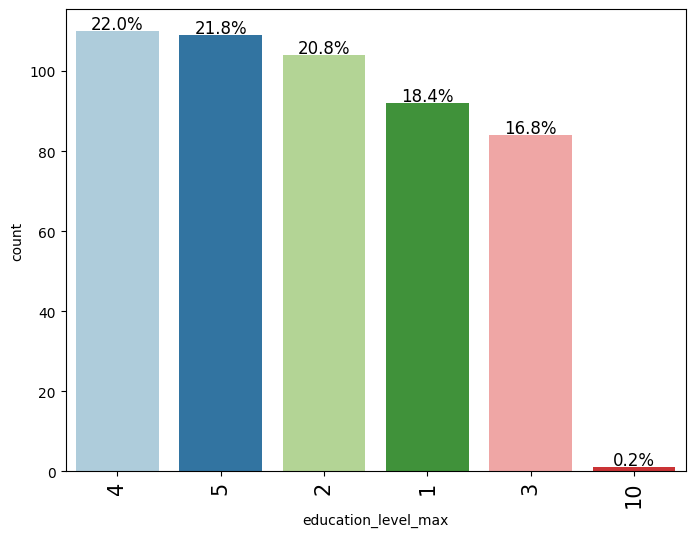

In [22]:
 labeled_barplot(data, "education_level_max", perc=True)

**Observations:**

**Balanced Spread:** Most families have a max education level between 2 and 5, with very even distribution across those levels.

## **Bivariate Analysis**

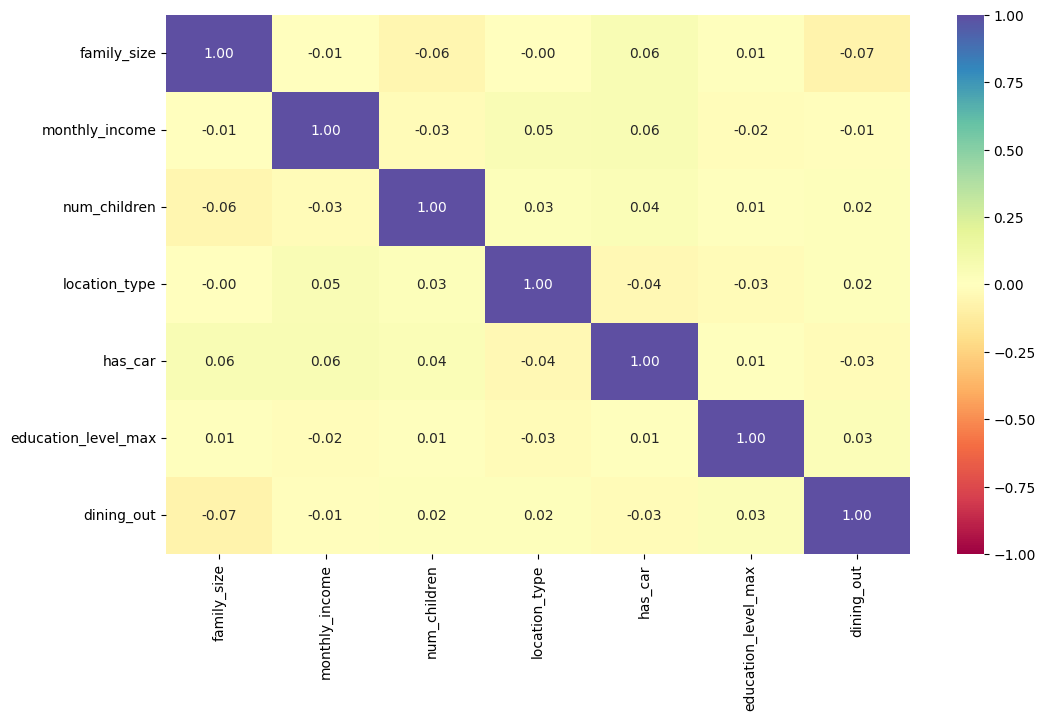

In [23]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('monthly_expenses')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There is very little correlation among the independent variables, so we do not have a serious problem of multicollinearity in this dataset. (Correlation should be more than 0.7 for any issues related to multicollinearity)

Observations:



monthly_expenses       1.000000
monthly_income         0.677967
dining_out             0.437310
location_type          0.349659
num_children           0.241343
family_size            0.213450
has_car                0.190120
education_level_max    0.152541
Name: monthly_expenses, dtype: float64


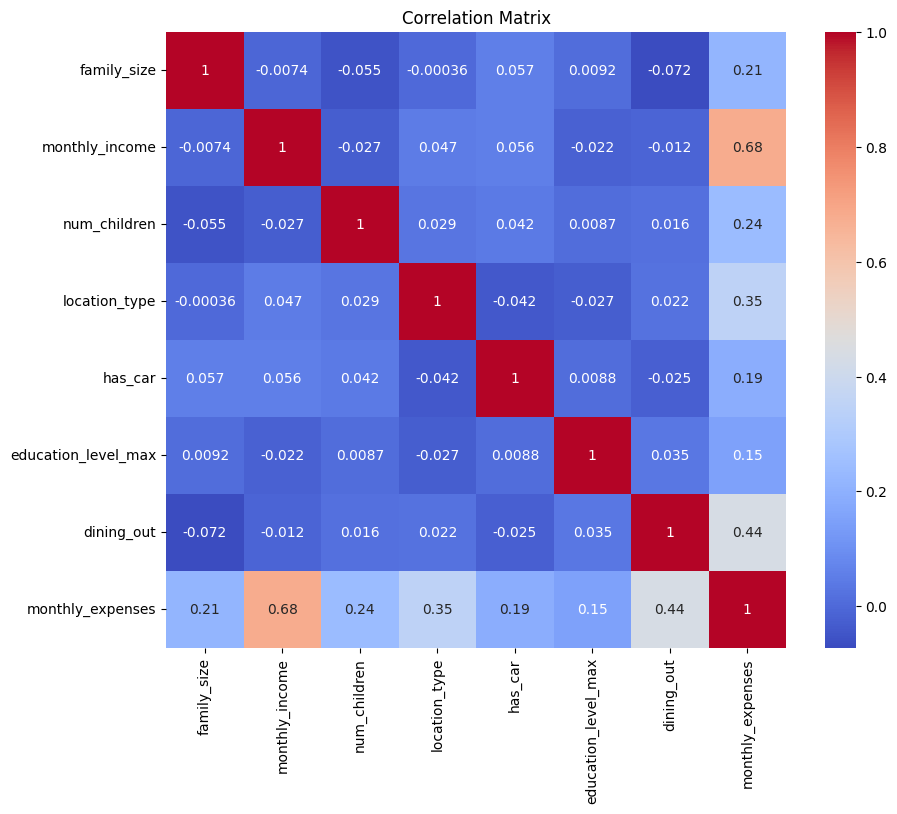

In [24]:
# the attributes that have a strong correlation with the target attribute (monthly_expenses)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Select the correlation with the target variable 'Personal_Loan'
corr_with_target = corr_matrix['monthly_expenses'].sort_values(ascending=False)

# Print the correlations
print(corr_with_target)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations:**

**monthly_income:**	0.678 - Strongest correlation. Families with more disposable income often spend more on housing, services, leisure, and dining. Great predictor for regression.

**dining_out:**	0.437 - Solid moderate correlation. Frequent dining out reflects lifestyle choices, and it's a direct expense.

**location_type:**	0.350 - Mild to moderate. Urban families (higher value) tend to spend more — due to higher cost of living, rent, services.

**num_children:**	0.241 - Moderate correlation. Each child adds a variety of expenses — school, healthcare, food, etc. The correlation isn’t stronger because it may overlap with family_size.

**family_size:** 0.213 -	Small-to-moderate correlation. More members = more mouths, but not all members are dependents. We should also look at relation with number of children.

**has_car:**	0.190 Weak . Owning a car introduces fixed and variable expenses, but not all families with cars use them heavily. Regional factors also influence this.

**education_level_max:**	0.153 - Weak correlation. Education level may influence long-term earning and spending behavior, but it doesn’t always reflect monthly costs.

**monthly_income** and **dining_out** are your MVPs (Most Valuable Player) for predicting expenses.

**education_level_max** and **has_car** are weaker predictors than expected.

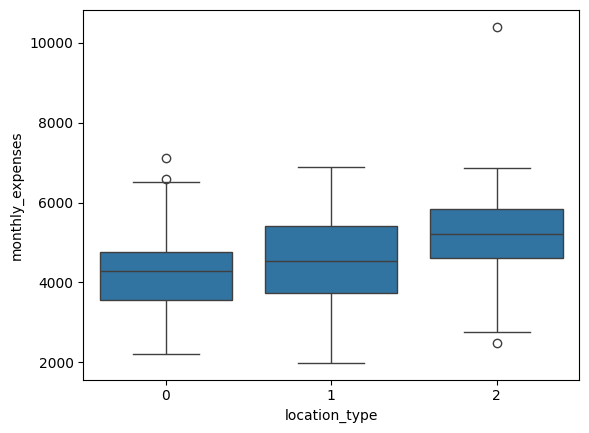

In [25]:
sns.boxplot(data=data, y='monthly_expenses', x='location_type');

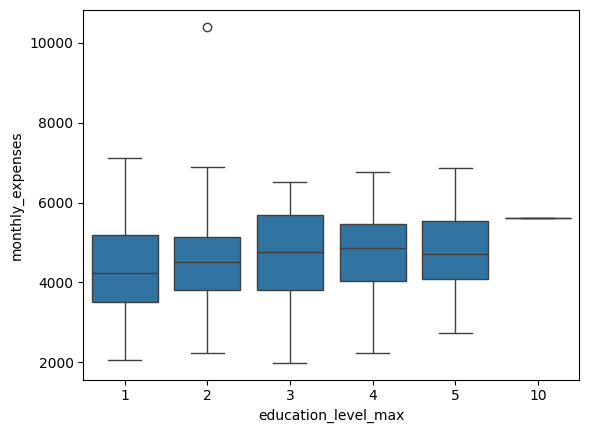

In [26]:
sns.boxplot(data=data, y='monthly_expenses', x='education_level_max');

<Axes: xlabel='monthly_income', ylabel='monthly_expenses'>

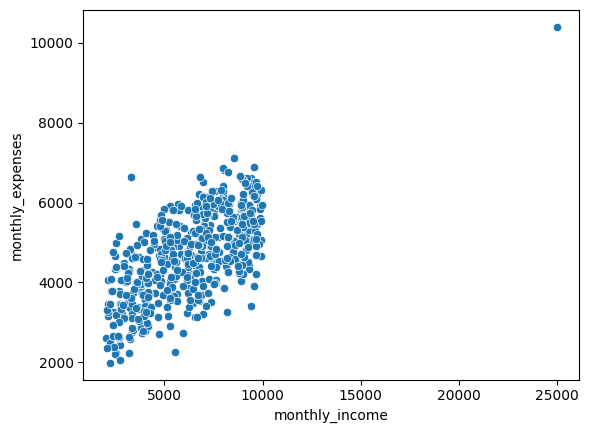

In [27]:
 sns.scatterplot(x='monthly_income', y='monthly_expenses', data=data)

<Axes: xlabel='dining_out', ylabel='monthly_expenses'>

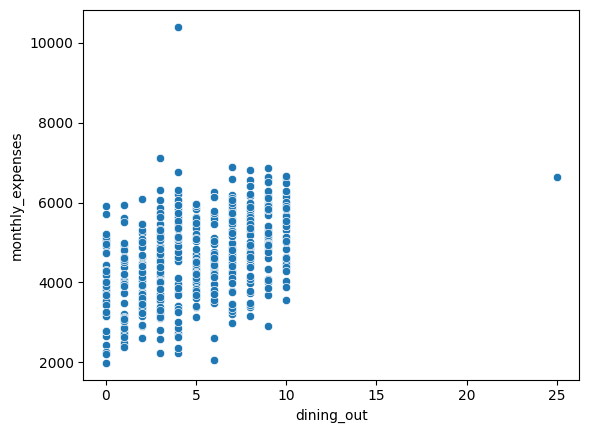

In [28]:
 sns.scatterplot(x='dining_out', y='monthly_expenses', data=data)

## **Data Preparation**

In [29]:
# defining the explanatory (independent) and response (dependent) variables
X = data.drop('monthly_expenses', axis=1)
y = data['monthly_expenses']

In [30]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

### create some test models

In [46]:
# defining the explanatory (independent) and response (dependent) variables
data_without_monthly_income = data.copy()
data_without_monthly_income.drop('monthly_income', axis=1, inplace=True)
X_without_monthly_income = data_without_monthly_income.drop('monthly_expenses', axis=1)
y_without_monthly_income = data['monthly_expenses'] #you could have kept it as Y as well

In [47]:
# splitting the data in 80:20 ratio for train and test sets
(X_without_monthly_income_train, X_without_monthly_income_test, y_without_monthly_income_train,
y_without_monthly_income_test) = train_test_split(
    X_without_monthly_income,    # specifying the independent variables
    y_without_monthly_income,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

## **Model Building**

### Single Linear Regression

In [31]:
# defining the independent variable
single_ind_var = ['dining_out']

In [32]:
# creating an instance of the linear regression model
lin_dining_regress = LinearRegression()

# fitting the model to the training data
lin_dining_regress.fit(X_train[single_ind_var], y_train)

LinearRegression()

In [33]:
# printing the linear regression coefficients
print(
    "Slope:", lin_dining_regress.coef_,
    "Intercept:", lin_dining_regress.intercept_,
)

Slope: [158.01154443] Intercept: 3813.8174756086037


In [34]:
# printing the linear regression equation
print(
    "Sales =",
     "(", lin_dining_regress.coef_[0], ")", "*", single_ind_var[0],
    "+", lin_dining_regress.intercept_,
)

Sales = ( 158.0115444339399 ) * dining_out + 3813.8174756086037


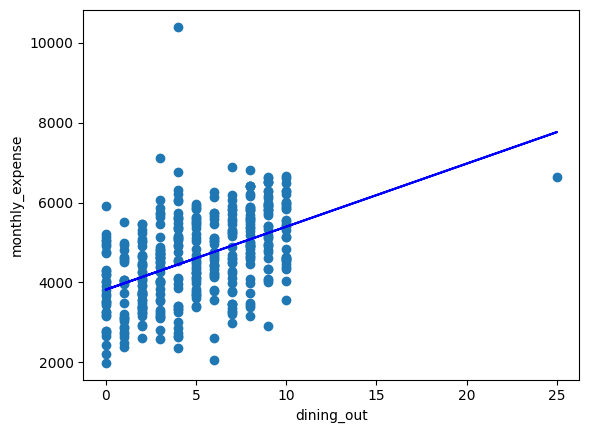

In [35]:
# plotting the best-fit line
fitted_values1 = lin_dining_regress.predict(X_train[single_ind_var])

# Plot the scatterplot and regression line
plt.scatter(X_train[single_ind_var], y_train)
plt.plot(X_train[single_ind_var], fitted_values1, color='blue')
plt.xlabel(single_ind_var[0])
plt.ylabel('monthly_expense')
plt.show()

###Multiple Linear Regression without monthly income

In [48]:
# creating an instance of the linear regression model
lin_multi_regres_without_monthly_income = LinearRegression()

# fitting the model to the training data
lin_multi_regres_without_monthly_income.fit(X_without_monthly_income_train, y_without_monthly_income_train)

LinearRegression()

In [49]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_multi_regres_without_monthly_income.coef_, lin_multi_regres_without_monthly_income.intercept_
)

Coefficients: [150.14697429 234.77613216 466.80526652 396.16497987 102.96681937
 154.98470284] 1895.1519812453366


In [50]:
# printing the linear regression equation
equation = "Monthly Expenses = ( " + str(lin_multi_regres_without_monthly_income.coef_[0]) + " ) * " + X_without_monthly_income_train.columns.tolist()[0]

for i in range(1, lin_multi_regres_without_monthly_income.coef_.shape[0]):
    equation += " + ( " + str(lin_multi_regres.coef_[i]) + " ) * " + X_without_monthly_income_train.columns.tolist()[i]

equation +=  " + " + str(lin_multi_regres_without_monthly_income.intercept_)

print(equation)

Monthly Expenses = ( 150.14697428548394 ) * family_size + ( 0.3027755468165625 ) * num_children + ( 251.98616281480668 ) * location_type + ( 408.9280149732388 ) * has_car + ( 321.2545718310562 ) * education_level_max + ( 110.80839062345387 ) * dining_out + 1895.1519812453366


###Multiple Linear Regression

In [52]:
# creating an instance of the linear regression model
lin_multi_regres = LinearRegression()

# fitting the model to the training data
lin_multi_regres.fit(X_train, y_train)

LinearRegression()

In [53]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_multi_regres.coef_, lin_multi_regres.intercept_
)

Coefficients: [1.81730387e+02 3.02775547e-01 2.51986163e+02 4.08928015e+02
 3.21254572e+02 1.10808391e+02 1.50533238e+02] -23.485770250557835


In [54]:
# printing the linear regression equation
equation = "Monthly Expenses = ( " + str(lin_multi_regres.coef_[0]) + " ) * " + X_train.columns.tolist()[0]

for i in range(1, lin_multi_regres.coef_.shape[0]):
    equation += " + ( " + str(lin_multi_regres.coef_[i]) + " ) * " + X_train.columns.tolist()[i]

equation +=  " + " + str(lin_multi_regres.intercept_)

print(equation)

Monthly Expenses = ( 181.7303872334899 ) * family_size + ( 0.3027755468165625 ) * monthly_income + ( 251.98616281480668 ) * num_children + ( 408.9280149732388 ) * location_type + ( 321.2545718310562 ) * has_car + ( 110.80839062345387 ) * education_level_max + ( 150.5332380061031 ) * dining_out + -23.485770250557835


## **Utility Functions**

In [55]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

In [56]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [57]:
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regression model
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    r2 = r2_score(target, pred)  # to compute R-squared
    adj_r2 = adj_r2_score(predictors, target, pred)  # to compute Adjusted R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adj_r2,
        },
        index=[0],
    )

    return df_perf

## **Model Performance Evaluation**

**RMSE (Root Mean Squared Error):** -  it punishes big mistakes more because it squares. Actual Expenses = 4000, Predicted = 4500. Error = square of 500

**MAE (Mean Absolute Error):** - Just take the average of all the absolute (positive) errors.  Error = 500

**MAPE Mean Absolute Percentage Error:** - Percent version of MAE — tells how far off you are, on average, in percentage terms. Error 11% miss

**R-squared (R²):** R² = 1 means your predictions are perfect. R² = 0 means your model is no better than guessing the average.

**Adjusted R-squared** It penalizes you for adding too many useless features.




**Single Linear Regression**

In [58]:
lin_dinig_train_perf = model_performance_regression(lin_dining_regress, X_train[single_ind_var], y_train)
lin_dinig_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,974.02759,784.120183,18.753889,0.217752,0.215787


In [59]:
lin_dinig_test_perf = model_performance_regression(lin_dining_regress, X_test[single_ind_var], y_test)
lin_dinig_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,960.891881,782.102887,17.588699,0.039022,0.029216


**Multi Linear Regression Without Monthly Income**

In [60]:
#Performance on Training Data
lin_multi_train_without_monthly_income_perf = model_performance_regression(lin_multi_regres_without_monthly_income, X_without_monthly_income_train, y_without_monthly_income_train)
lin_multi_train_without_monthly_income_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,789.880922,635.229208,15.016321,0.485571,0.477718


In [61]:
lin_dinig_test_without_monthly_income_perf = model_performance_regression(lin_multi_regres_without_monthly_income, X_without_monthly_income_test, y_without_monthly_income_test)
lin_dinig_test_without_monthly_income_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,741.346316,619.444933,13.606658,0.427986,0.391082


**Multiple Linear Regression**

In [62]:
#Performance on Training Data
lin_multi_train_perf = model_performance_regression(lin_multi_regres, X_train, y_train)
lin_multi_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,280.5631,226.671884,5.278074,0.935097,0.933938


In [63]:
#Performance on Test Data
lin_multi_test_perf = model_performance_regression(lin_multi_regres, X_test, y_test)
lin_multi_test_perf


,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,316.342556,256.292584,5.656598,0.895845,0.88792


**Model Comparison**

In [68]:
# training performance comparison

# concatenating all the training performance dataframes
models_train_comp_df = pd.concat(
    [
        lin_dinig_train_perf.T,
        lin_multi_train_perf.T,
        lin_dinig_test_without_monthly_income_perf.T
    ],
    axis=1,
)

# defining the list of models built
models_train_comp_df.columns = [
    "Simple Linear Regression - Monthly Expenses vs Dining Out",
    "Multiple Linear Regression - Monthly Expenses vs All independent variables",
    "Multiple Linear Regression Without Monthly Income - Monthly Expenses vs All independent variables except Monthly Income",

]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,RMSE,MAE,MAPE,R-squared,Adj R-squared
Simple Linear Regression - Monthly Expenses vs Dining Out,974.027590,784.120183,18.753889,0.217752,0.215787
Multiple Linear Regression - Monthly Expenses vs All independent variables,280.563100,226.671884,5.278074,0.935097,0.933938
Multiple Linear Regression Without Monthly Income - Monthly Expenses vs All independent variables except Monthly Income,741.346316,619.444933,13.606658,0.427986,0.391082


In [69]:
# Test performance comparison

# concatenating all the training performance dataframes
models_test_comp_df = pd.concat(
    [
        lin_dinig_test_perf.T,
        lin_multi_test_perf.T,
        lin_dinig_test_without_monthly_income_perf.T
    ],
    axis=1,
)

# defining the list of models built
models_test_comp_df.columns = [
    "Simple Linear Regression - Monthly Expenses vs Dining Out",
    "Multiple Linear Regression - Monthly Expenses vs All independent variables",
    "Multiple Linear Regression Without Monthly Income - Monthly Expenses vs All independent variables except Monthly Income",
]

print("Testing performance comparison:")
models_train_comp_df.T

Testing performance comparison:


,RMSE,MAE,MAPE,R-squared,Adj R-squared
Simple Linear Regression - Monthly Expenses vs Dining Out,974.027590,784.120183,18.753889,0.217752,0.215787
Multiple Linear Regression - Monthly Expenses vs All independent variables,280.563100,226.671884,5.278074,0.935097,0.933938
Multiple Linear Regression Without Monthly Income - Monthly Expenses vs All independent variables except Monthly Income,741.346316,619.444933,13.606658,0.427986,0.391082


## **Conclusion and Key Takeaways**

* As expected, Multi Linear Regression wins over Simple Linear Regression by miles as the earlier has low RMSE, MAE, MAPE and close to 1 R-Squared and Adj R-squared.

* One or two variables may not predict your monthly expenses correclty as your expenses depend on multiple factors. Dining out is a bigger factor, but not sufficient on it's own.

* R2 values are closer (93%) on test and train data. There is not much difference, outlining there is no overfitting.

* Income drives the monthly expenses the most

* Using multiple real-life factors, the regression model explains 93.5% of monthly expense variation with low error, high accuracy, and no signs of overfitting — making it both powerful and reliable

